# Email Spam filter

### Abstract

### Dependencies

### DataSet
This project used the Dataset downloaded from "https://archive.ics.uci.edu/ml/datasets/Spambase" which refers to sample Project 3 in MSA project AI & Advanced Analysis (A ML model to identify emails are spam or not - Dataset)

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("dataset/spambase.data", header = None)

In [2]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
dataset.shape

(4601, 58)

In [4]:
dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

The output of above cell is all zero, which indicates that the dataset has no missing values and do not need data cleaning.

Next, I am spliting the dataset into train dataset and test dataset. I've set the train test ratio to be 80/20, which is a very commonly used ratio number.

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(dataset.drop(dataset.columns[-1],1), dataset[57], train_size = 0.8, test_size = 0.2, random_state = 4)


Since the index is random after splitting, I need to reset all the indexes.

In [6]:
train_X = train_X.reset_index(drop = True)
train_Y = train_Y.reset_index(drop = True)
test_X = test_X.reset_index(drop = True)
test_Y = test_Y.reset_index(drop = True)

Checking the data is now what I expected.

In [7]:
print(train_X.head())
print(train_X.describe())

     0     1     2    3     4     5     6     7     8     9  ...    47    48  \
0  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00 ...   0.0  0.00   
1  0.18  0.00  0.18  0.0  1.59  0.36  0.00  0.06  0.06  0.06 ...   0.0  0.01   
2  0.17  0.00  0.17  0.0  1.45  0.34  0.05  0.05  0.05  0.05 ...   0.0  0.01   
3  0.00  0.18  0.00  0.0  0.18  0.00  0.00  0.37  0.00  0.00 ...   0.0  0.00   
4  0.64  0.00  0.64  0.0  1.29  0.00  0.64  0.00  0.00  0.00 ...   0.0  0.00   

      49   50     51     52   53     54  55   56  
0  0.000  0.0  0.000  0.000  0.0  1.250   2   10  
1  0.052  0.0  0.010  0.169  0.0  1.748  12  444  
2  0.051  0.0  0.020  0.163  0.0  1.796  12  460  
3  0.244  0.0  0.000  0.000  0.0  1.663  10  168  
4  0.104  0.0  0.522  0.313  0.0  2.511  22  113  

[5 rows x 57 columns]
                0            1            2            3            4   \
count  3680.000000  3680.000000  3680.000000  3680.000000  3680.000000   
mean      0.100557     0.220856     0.2819

In [8]:
print(train_Y.head())
print(train_Y.describe())

0    0
1    1
2    1
3    0
4    1
Name: 57, dtype: int64
count    3680.000000
mean        0.395109
std         0.488940
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 57, dtype: float64


In [9]:
print(test_X.head())
print(test_X.describe())

     0    1    2    3     4     5    6    7    8    9  ...   47     48     49  \
0  0.00  0.0  0.0  0.0  0.00  0.79  0.0  0.0  0.0  0.0 ...  0.0  0.000  0.147   
1  0.00  0.8  0.0  0.0  0.00  0.00  0.0  0.0  0.0  1.6 ...  0.0  0.000  0.000   
2  0.00  0.0  0.0  0.0  0.81  0.00  0.0  0.0  0.0  0.0 ...  0.0  0.000  0.143   
3  0.00  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0 ...  0.0  0.000  0.000   
4  0.74  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0 ...  0.0  0.134  0.672   

    50     51   52   53     54  55  56  
0  0.0  0.000  0.0  0.0  2.913  27  67  
1  0.0  0.235  0.0  0.0  1.380   4  29  
2  0.0  0.143  0.0  0.0  1.055   2  19  
3  0.0  3.048  0.0  0.0  1.000   1   8  
4  0.0  0.000  0.0  0.0  1.863   5  41  

[5 rows x 57 columns]
               0           1           2           3           4           5   \
count  921.000000  921.000000  921.000000  921.000000  921.000000  921.000000   
mean     0.120521    0.181683    0.275527    0.011346    0.328165    0.095657   
s

In [10]:
print(test_Y.head())
print(test_Y.describe())

0    1
1    0
2    0
3    0
4    0
Name: 57, dtype: int64
count    921.000000
mean       0.389794
std        0.487968
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 57, dtype: float64


In [11]:
train_X.shape

(3680, 57)

In [12]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)
train_Y[1]

Using TensorFlow backend.


array([0., 1.], dtype=float32)

In [22]:
import tensorflow as tf
import keras

model = keras.models.Sequential()
###

###
# REPLACE THE <inputNodes>, <hiddenNotes1>, <hiddenNotes2>, <outputNotes> BELOW WITH THE APPROPRIATE NUMBERS OF NODES AS DESCRIBED ABOVE
###
structure = [57, 57, 57, 2]
###

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

# Output layer - note that the activation function is softmax
# Softmax will predict a category and provide a value for how likely this is the correct prediction.
model.add(keras.layers.Dense(units=structure[3], activation = tf.nn.softmax))

print("Layer structure:", structure)

Layer structure: [57, 57, 57, 2]


In [23]:




model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
###

# Time to fit the model
print('Starting training')

###
# REPLACE THE <addTrainX> WITH train_X AND <addTrainY> WITH train_Y
###
training_stats = model.fit(train_X, train_Y, batch_size = 128, epochs = 5)
###

print('Training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%'
      %(training_stats.history['loss'][-1], 100 * training_stats.history['accuracy'][-1]))

Starting training
Epoch 1/5
3680/3680 [==============================] - 0s 26us/step - loss: 12.0156 - accuracy: 0.5101
Epoch 2/5
3680/3680 [==============================] - 0s 9us/step - loss: 0.6721 - accuracy: 0.6160
Epoch 3/5
3680/3680 [==============================] - 0s 8us/step - loss: 0.6299 - accuracy: 0.6910
Epoch 4/5
3680/3680 [==============================] - 0s 8us/step - loss: 0.6157 - accuracy: 0.6978
Epoch 5/5
3680/3680 [==============================] - 0s 8us/step - loss: 0.6243 - accuracy: 0.6829
Training finished
Training Evaluation: loss = 0.624, accuracy = 68.29%


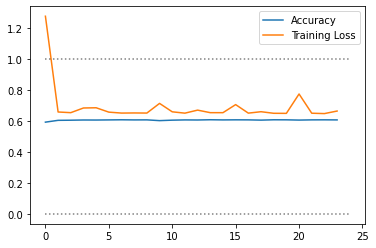

In [15]:
import matplotlib.pyplot as graph
accuracy, = graph.plot(training_stats.history['accuracy'],label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'],label = 'Training Loss')


graph.legend(handles = [accuracy,training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

In [24]:
evaluation = model.evaluate(test_X, test_Y, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f%%' %(evaluation[0], 100*evaluation[1]))

921/921 [==============================] - 0s 43us/step
Test Set Evaluation: loss = 0.646417, accuracy = 66.56%
